In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
data = "C:\\Users\\HP\\Desktop\\Canada Refugee data.xlsx"
table = pd.read_excel(data)
table.head()

,Year,Country-of-origin,UNHR-refugees,Asylum-seekers,total-count
0,2020,Stateless,179,170,349
1,2020,Saint Kitts and Nevis,44,0,44
2,2020,Sudan,1776,549,2325
3,2020,Slovakia,1180,138,1318
4,2020,Slovenia,6,0,6


In [278]:
table["Country-of-origin"] =table["Country-of-origin"].replace("Unknown","not specific")

In [279]:
for y in table["Country-of-origin"]:
    print(y)

Stateless
Saint Kitts and Nevis
Sudan
Slovakia
Slovenia
Eswatini
Syrian Arab Rep.
United Rep. of Tanzania
Tajikistan
Turkmenistan
Timor-Leste
Togo
Trinidad and Tobago
Tunisia
Türkiye
United Arab Emirates
Uganda
not specific
Ukraine
United States of America
Uzbekistan
Saint Vincent and the Grenadines
Venezuela (Bolivarian Republic of)
Yemen
Zambia
Zimbabwe
Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Egypt
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Barbados
Burundi
Belgium
Benin
Bangladesh
Bahamas
Burkina Faso
Belarus
Bolivia (Plurinational State of)
Botswana
Brazil
Bosnia and Herzegovina
Bulgaria
Belize
Cambodia
Central African Rep.
Chad
China
Chile
Cameroon
Congo
Dem. Rep. of the Congo
Comoros
Colombia
Costa Rica
Cuba
Cabo Verde
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Rep.
Ecuador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Palestinian
United Kingdom of Great Britain and Northern Ireland
Georgia
Germany
Ghana
Guinea-Biss

In [280]:
table.describe() 

,Year,UNHR-refugees,Asylum-seekers,total-count
count,368.000000,368.000000,368.000000,368.000000
mean,2021.394022,799.470109,528.831522,1328.301630
std,0.617340,4122.189901,1801.159352,4785.237928
min,2020.000000,0.000000,0.000000,5.000000
25%,2021.000000,10.000000,12.000000,31.000000
50%,2021.000000,72.500000,65.500000,165.000000
75%,2022.000000,482.250000,300.500000,909.500000
max,2022.000000,75098.000000,19765.000000,75294.000000


In [199]:
table.isnull().value_counts()

Year   Country-of-origin  UNHR-refugees  Asylum-seekers  total-count
False  False              False          False           False          368
Name: count, dtype: int64

In [281]:
table.dtypes

Year                  int64
Country-of-origin    object
UNHR-refugees         int64
Asylum-seekers        int64
total-count           int64
dtype: object

In [282]:
# From which countries has Canada admitted the highest number of refugees

highest_ad_C = table.groupby("Country-of-origin")["UNHR-refugees"].max()
highest_ad_C=highest_ad_C.reset_index()
highest_ad_C.sort_values(by="UNHR-refugees", inplace=True, ascending=False)
highest_ad_C.head(10)

,Country-of-origin,UNHR-refugees
163,Ukraine,75098
114,Nigeria,10172
176,not specific,10016
118,Pakistan,7171
77,Iran (Islamic Rep. of),7134
161,Türkiye,7085
32,China,5925
34,Colombia,5835
75,India,5180
71,Haiti,4295


In [305]:
#saving to memory
highest_ad_C.to_csv("Countries with the most refugees in canada")

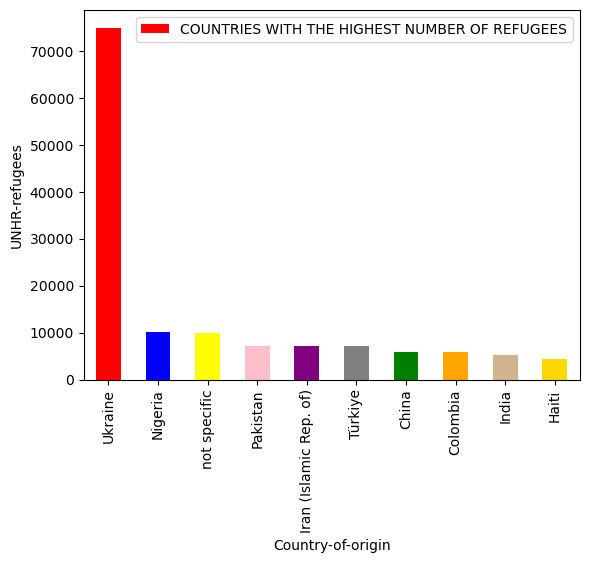

<Figure size 800x600 with 0 Axes>

In [283]:
highest_ad_C.head(10).plot(kind="bar",x="Country-of-origin",y="UNHR-refugees",color= ["red","blue","yellow","pink","purple","grey","green","orange","tan","gold"] ,label = "COUNTRIES WITH THE HIGHEST NUMBER OF REFUGEES")
plt.xlabel("Country-of-origin")
plt.ylabel("UNHR-refugees")
plt.figure(figsize=(8,6))
plt.show()

In [258]:
#Total number ofrestteled refugees in canada per year
no_of_R = table.groupby("Year")["UNHR-refugees"].sum()
no_of_R = no_of_R.reset_index()
no_of_R.sort_values(by = "UNHR-refugees", inplace= True, ascending=False)
no_of_R.head()

,Year,UNHR-refugees
2,2022,140621
1,2021,130125
0,2020,23459


In [304]:
#saving this to memory
no_of_R.to_csv("newRef")

Text(0.5, 0, 'Year')

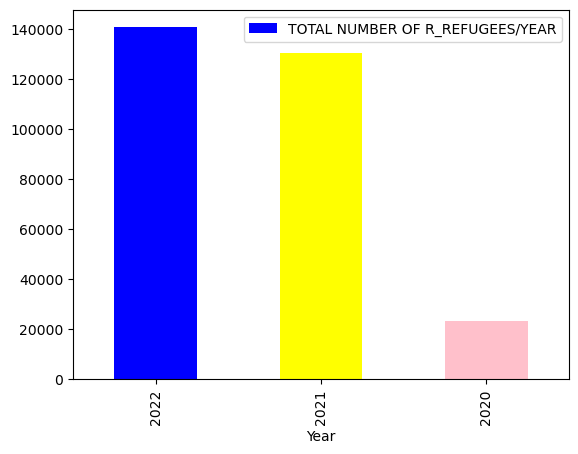

In [291]:
no_of_R.head().plot(kind="bar",x="Year",y="UNHR-refugees",color= ["blue","yellow","pink","purple","grey","green","orange","tan","gold"] ,label = "TOTAL NUMBER OF R_REFUGEES/YEAR")
plt.xlabel("Year")

In [309]:
#Total number of Asylum-seekers in canada per year
no_of_A = table.groupby("Year")["Asylum-seekers"].sum()
no_of_A = no_of_R.reset_index()
no_of_A.sort_values(by = "Asylum-seekers", inplace= True, ascending=False)
no_of_A.head()

,index,Year,Asylum-seekers
0,2,2022,113066
1,1,2021,63143
2,0,2020,18401


In [314]:
no_of_A.to_csv("Asylum in Canada peryear")

Text(0, 0.5, 'Asylum-seekers')

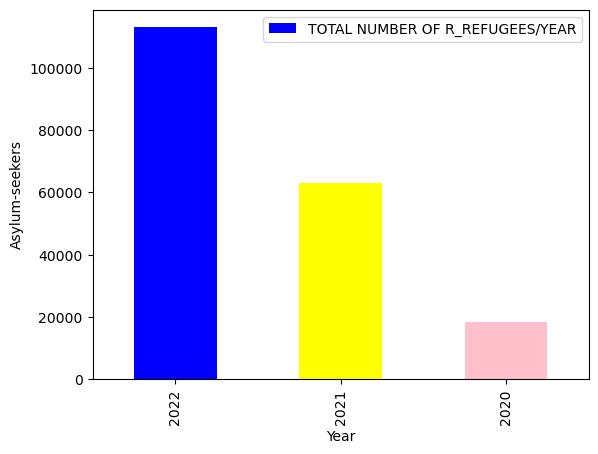

In [315]:
no_of_R.head().plot(kind="bar",x="Year",y="Asylum-seekers",color= ["blue","yellow","pink","purple","grey","green","orange","tan","gold"] ,label = "TOTAL NUMBER OF R_REFUGEES/YEAR")
plt.xlabel("Year")
plt.ylabel("Asylum-seekers")

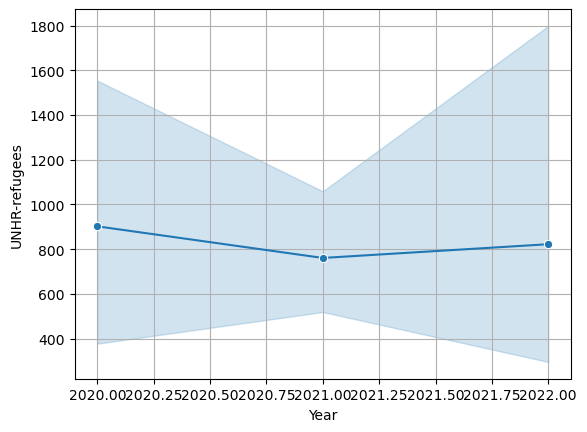

<Figure size 800x500 with 0 Axes>

In [339]:
#Trends in Refugee and asylum stat from 2012-2022
table["Year"]= table["Year"].astype(int)
sns.lineplot(x="Year",y="UNHR-refugees",data= table,marker="o")
plt.grid()
plt.figure(figsize=(8,5))
plt.show()

In [355]:
#Train ARIMA model for forcasting number of refugees that will be in canada in next 6years
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(table["UNHR-refugees"],
              order=(2,1,2))
model_fit=model.fit()

forecast=model_fit.forecast(steps=5)
pd.DataFrame(forecast)

,predicted_mean
368,852.537747
369,751.025358
370,843.975293
371,751.240887
372,843.920524


ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

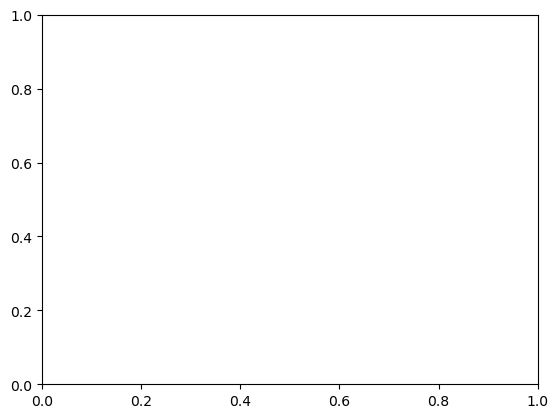

In [356]:
future = list(range(table["Year"].max()+1 ,
table["Year"].max()+5))
plt.plot(future,forecast,marker="o",linestyle="dashed",color="red")

In [367]:
import requests
from bs4 import BeautifulSoup
url = "https://www.unhcr.org/refugee-statistics/download?url=8tIY7I"
with open ("canaR.xlsx","wb") as file:
    file.write(response.content)
print("DDDDD")


DDDDD


In [368]:
a = pd.read_excel("canaR.xlsx")

ValueError: Excel file format cannot be determined, you must specify an engine manually.